In [7]:
import pandas as pd
import numpy as np
from talib import RSI, BBANDS, MACD
import matplotlib.pyplot as plt

In [2]:
mod1=pd.read_csv('input_df_mod1.csv',index_col=0)
mod2=pd.read_csv('input_df_mod2.csv',index_col=0)

In [3]:
mod1.head()

,tiger_close,tiger_volume,tiger_label,sp500_adjclose,sp500_volume,sp500_f_adjclose,sp500_f_volume,actual_growth,pred_growth,prev_growth,...,WEAT_adjclose,WEAT_volume,MOO_adjclose,MOO_volume,tiger_metal_close,tiger_metal_volume,tiger_oil_close,tiger_oil_volume,usd_f_close,usd_f_volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-19,10060,23905,-1,1204.089966,4.254190e+09,1197.75,2446620.0,1.3,1.2,1.0,...,24.570000,100.0,40.831242,912500.0,8755.0,629.0,9585.0,5659.0,11205.0,35909.0
2011-09-20,10090,4621,1,1202.089966,4.315610e+09,1196.00,2614553.0,1.3,1.2,1.0,...,24.870001,1000.0,40.279140,1184500.0,8485.0,1053.0,9460.0,6436.0,11333.0,43425.0
2011-09-21,10050,11025,-1,1166.760010,4.728550e+09,1155.75,3254771.0,1.3,1.2,1.0,...,24.230000,300.0,38.738174,1341600.0,8445.0,632.0,9520.0,2726.0,11330.0,35780.0
2011-09-22,9825,30412,-1,1129.560059,6.703140e+09,1123.50,4741905.0,1.3,1.2,1.0,...,23.000000,1000.0,36.562710,2631200.0,8400.0,792.0,9300.0,8987.0,11630.0,53347.0
2011-09-23,9435,25156,-1,1136.430054,5.639930e+09,1129.75,3365634.0,1.3,1.2,1.0,...,23.559999,300.0,36.719284,1703400.0,7860.0,4467.0,8785.0,23406.0,11785.0,138997.0


In [4]:
mod2.head()

,kodex_close,kodex_volume,kodex_label,sp500_adjclose,sp500_volume,sp500_f_adjclose,sp500_f_volume,actual_growth,pred_growth,prev_growth,...,WEAT_adjclose,WEAT_volume,MOO_adjclose,MOO_volume,kodex_dollar_close,kodex_dollar_volume,kodex_metal_close,kodex_metal_volume,gsci_adjclose,base_rate
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-24,10330,249973,-1,2469.909912,3.010240e+09,2468.50,857750.0,2.6,2.6,1.2,...,7.47,250200.0,52.905434,26300.0,9340,23457,9846,12631,76.34,1.16
2017-07-25,10470,249826,1,2477.129883,4.108060e+09,2474.00,1074033.0,2.6,2.6,1.2,...,7.29,286600.0,52.961510,36400.0,9350,8061,9954,10877,74.58,1.16
2017-07-26,10175,250878,-1,2477.830078,3.557020e+09,2473.25,972444.0,2.6,2.6,1.2,...,7.33,269400.0,52.961510,18500.0,9400,24160,10088,7780,75.34,1.16
2017-07-27,10250,230167,1,2475.419922,3.995520e+09,2472.00,1647577.0,2.6,2.6,1.2,...,7.36,333800.0,52.886742,27600.0,9330,16537,10270,16202,75.77,1.16
2017-07-28,10270,215680,1,2472.100098,3.294770e+09,2470.25,1156784.0,2.6,2.6,1.2,...,7.37,231400.0,53.036274,31600.0,9395,140945,10219,16137,75.93,1.16


<AxesSubplot:xlabel='Date'>

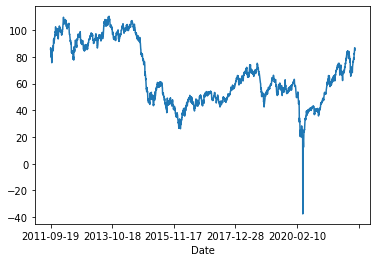

In [5]:
mod1['crude_oil_adjclose'].plot()

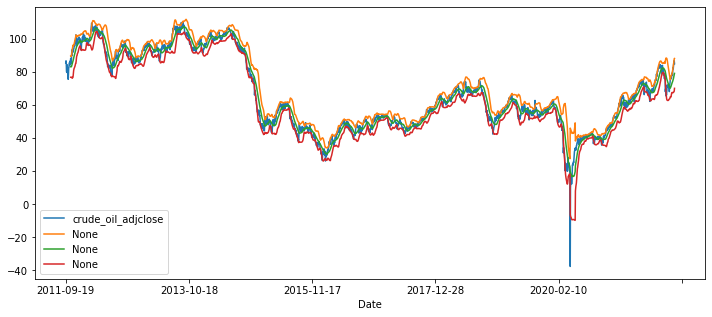

In [16]:
up_oil_1, mid_oil_1, low_oil_1 = BBANDS(mod1['crude_oil_adjclose'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod1['crude_oil_adjclose'].plot(figsize=(12,5))
up_oil_1.plot(figsize=(12,5))
mid_oil_1.plot(figsize=(12,5))
low_oil_1.plot(figsize=(12,5))
plt.legend()

In [20]:
mod1['crude_oil_adjclose']=mod1['crude_oil_adjclose'].clip(lower=low_oil_1.min())

<AxesSubplot:xlabel='Date'>

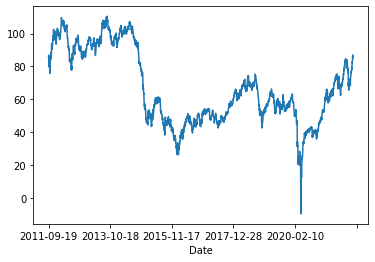

In [21]:
mod1['crude_oil_adjclose'].plot()

<AxesSubplot:xlabel='Date'>

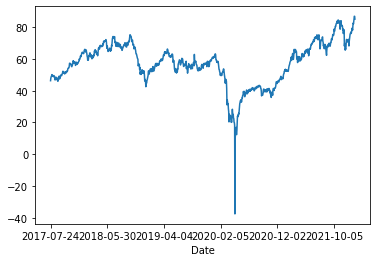

In [22]:
mod2['crude_oil_adjclose'].plot()

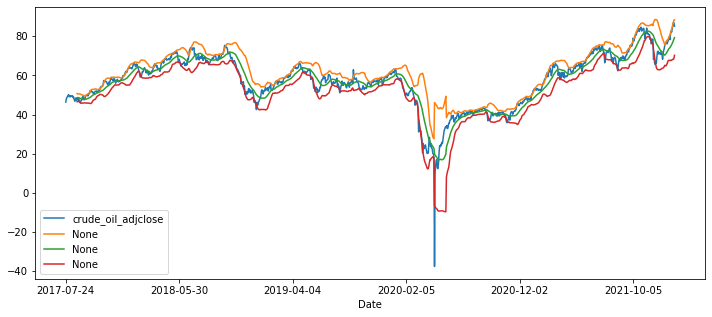

In [24]:
up_oil_2, mid_oil_2, low_oil_2 = BBANDS(mod2['crude_oil_adjclose'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod2['crude_oil_adjclose'].plot(figsize=(12,5))
up_oil_2.plot(figsize=(12,5))
mid_oil_2.plot(figsize=(12,5))
low_oil_2.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

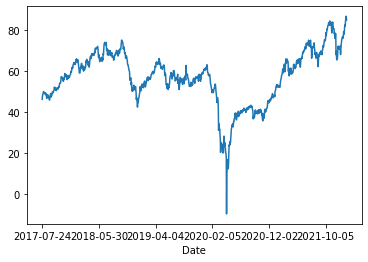

In [25]:
mod2['crude_oil_adjclose']=mod2['crude_oil_adjclose'].clip(lower=low_oil_2.min())
mod2['crude_oil_adjclose'].plot()

<AxesSubplot:xlabel='Date'>

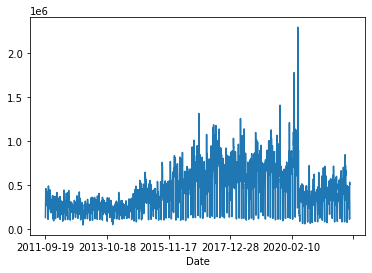

In [26]:
mod1['crude_oil_volume'].plot()

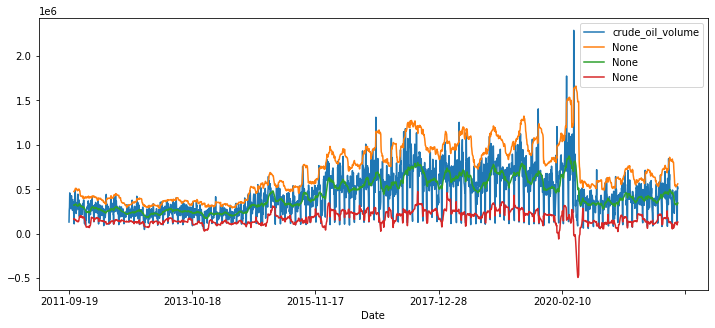

In [27]:
up_oilv_1, mid_oilv_1, low_oilv_1 = BBANDS(mod1['crude_oil_volume'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod1['crude_oil_volume'].plot(figsize=(12,5))
up_oilv_1.plot(figsize=(12,5))
mid_oilv_1.plot(figsize=(12,5))
low_oilv_1.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

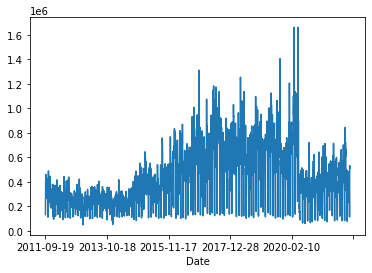

In [28]:
mod1['crude_oil_volume']=mod1['crude_oil_volume'].clip(upper=up_oilv_1.max())
mod1['crude_oil_volume'].plot()

<AxesSubplot:xlabel='Date'>

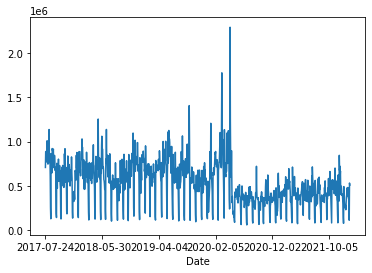

In [29]:
mod2['crude_oil_volume'].plot()


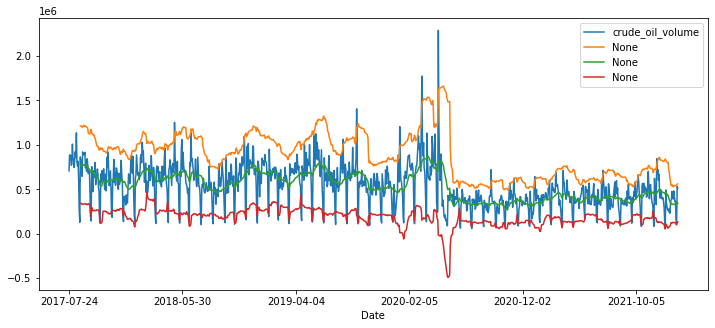

In [30]:
up_oilv_2, mid_oilv_2, low_oilv_2 = BBANDS(mod2['crude_oil_volume'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod2['crude_oil_volume'].plot(figsize=(12,5))
up_oilv_2.plot(figsize=(12,5))
mid_oilv_2.plot(figsize=(12,5))
low_oilv_2.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

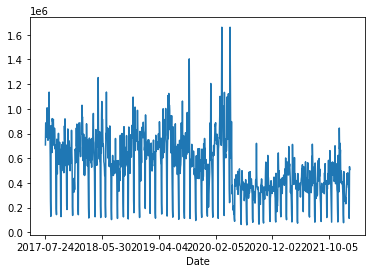

In [31]:
mod2['crude_oil_volume']=mod2['crude_oil_volume'].clip(upper=up_oilv_2.max())
mod2['crude_oil_volume'].plot()

<AxesSubplot:xlabel='Date'>

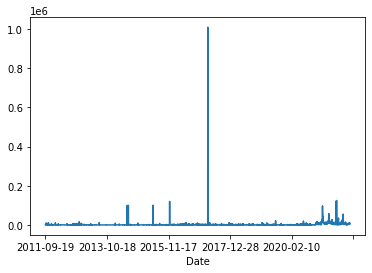

In [32]:
mod1['tiger_metal_volume'].plot()

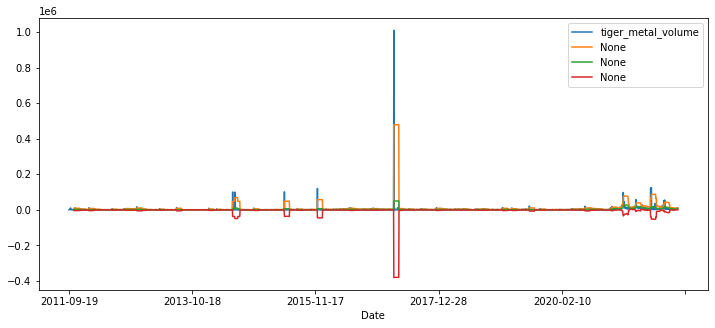

In [33]:
up_m_vol, mid_m_vol, low_m_vol = BBANDS(mod1['tiger_metal_volume'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod1['tiger_metal_volume'].plot(figsize=(12,5))
up_m_vol.plot(figsize=(12,5))
mid_m_vol.plot(figsize=(12,5))
low_m_vol.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

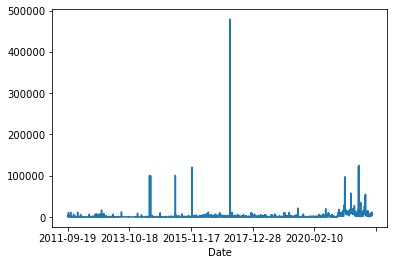

In [34]:
mod1['tiger_metal_volume']=mod1['tiger_metal_volume'].clip(upper=up_m_vol.max())
mod1['tiger_metal_volume'].plot()

<AxesSubplot:xlabel='Date'>

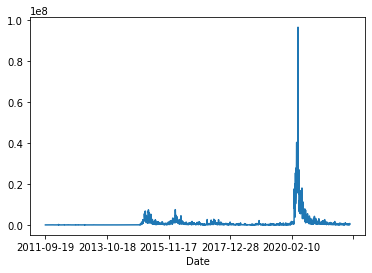

In [35]:
mod1['tiger_oil_volume'].plot()


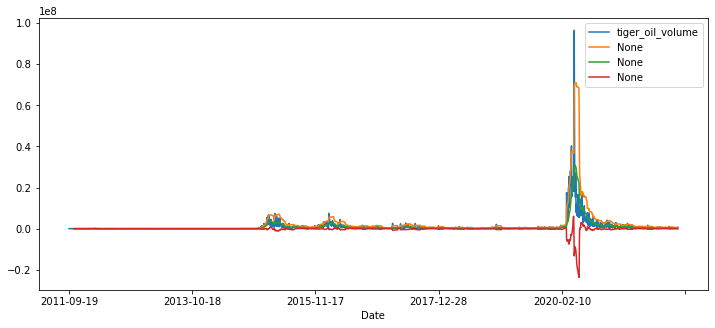

In [36]:
up_o_vol, mid_o_vol, low_o_vol = BBANDS(mod1['tiger_oil_volume'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod1['tiger_oil_volume'].plot(figsize=(12,5))
up_o_vol.plot(figsize=(12,5))
mid_o_vol.plot(figsize=(12,5))
low_o_vol.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

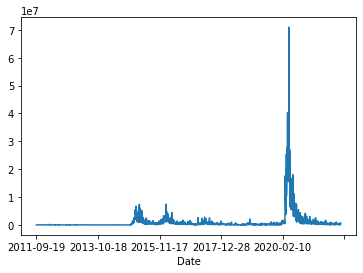

In [37]:
mod1['tiger_oil_volume']=mod1['tiger_oil_volume'].clip(upper=up_o_vol.max())
mod1['tiger_oil_volume'].plot()

<AxesSubplot:xlabel='Date'>

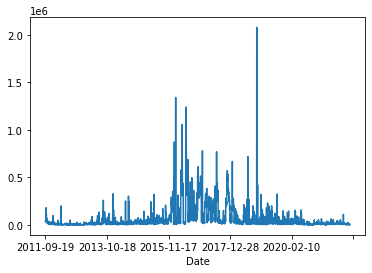

In [38]:
mod1['usd_f_volume'].plot()

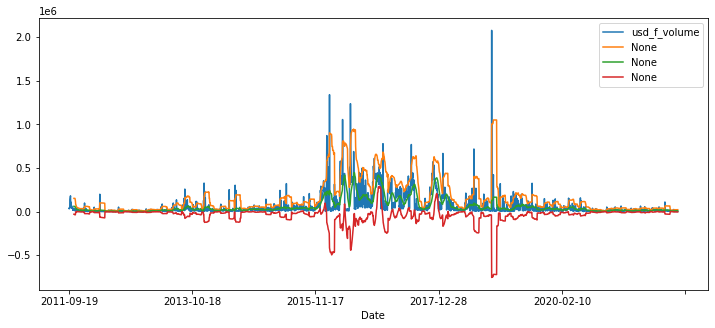

In [39]:
up_f_vol, mid_f_vol, low_f_vol = BBANDS(mod1['usd_f_volume'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

mod1['usd_f_volume'].plot(figsize=(12,5))
up_f_vol.plot(figsize=(12,5))
mid_f_vol.plot(figsize=(12,5))
low_f_vol.plot(figsize=(12,5))
plt.legend()

<AxesSubplot:xlabel='Date'>

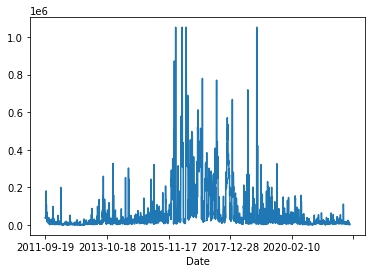

In [40]:
mod1['usd_f_volume']=mod1['usd_f_volume'].clip(upper=up_f_vol.max())
mod1['usd_f_volume'].plot()

In [42]:
mod1['wheat_close']=(mod1['wheat_ke_close']+mod1['wheat_zw_close'])/2
mod1['wheat_volume']=(mod1['wheat_ke_volume']+mod1['wheat_ke_volume'])/2
mod2['wheat_close']=(mod2['wheat_ke_close']+mod2['wheat_zw_close'])/2
mod2['wheat_volume']=(mod2['wheat_ke_volume']+mod2['wheat_ke_volume'])/2




In [50]:
mod1.drop(['wheat_ke_close','wheat_zw_close'],axis=1,inplace=True)
mod2.drop(['wheat_ke_close','wheat_zw_close'],axis=1,inplace=True)


In [51]:
mod1.to_csv('model1.csv')
mod2.to_csv('model2.csv')

모델의 성능을 올리기 위해서 각 price의 lag 값을 feature 넣고 모델을 학습시키기로 하였다

In [65]:
model1=pd.read_csv('input_df_mod1.csv',index_col=0)
model2=pd.read_csv('input_df_mod2.csv',index_col=0)


In [66]:
print(model1.columns)
print(model2.columns)

Index(['tiger_close', 'tiger_volume', 'tiger_label', 'sp500_adjclose',
       'sp500_volume', 'sp500_f_adjclose', 'sp500_f_volume', 'actual_growth',
       'pred_growth', 'prev_growth', 'sugar_close', 'sugar_volume',
       'soybean_close', 'soybean_volume', 'corn_close', 'corn_volume',
       'crude_oil_adjclose', 'crude_oil_volume', 'ethanol_close',
       'ethanol_volume', 'tbond_fut_adjclose', 'tbond_fut_volume',
       'DBA_adjclose', 'DBA_volume', 'CORN_adjclose', 'CORN_volume',
       'SOYB_adjclose', 'SOYB_volume', 'WEAT_adjclose', 'WEAT_volume',
       'MOO_adjclose', 'MOO_volume', 'tiger_metal_close', 'tiger_metal_volume',
       'tiger_oil_close', 'tiger_oil_volume', 'usd_f_close', 'usd_f_volume',
       'growth_pred_error', 'growth_prev_resid', 'wheat_close', 'wheat_volume',
       'tiger_close_mean', 'sp500_adjclose_mean', 'sp500_f_adjclose_mean',
       'sugar_close_mean', 'wheat_close_mean', 'soybean_close_mean',
       'corn_close_mean', 'crude_oil_adjclose_mean', 'etha

In [67]:
cols=[]
lags=3
for lag in range(1,1+lags):
    col=f'lag_{lag}'
    model1[col]=model1['tiger_close'].shift(lag)
    cols.append(col)
model1.dropna(inplace=True)

In [68]:
model1.columns

Index(['tiger_close', 'tiger_volume', 'tiger_label', 'sp500_adjclose',
       'sp500_volume', 'sp500_f_adjclose', 'sp500_f_volume', 'actual_growth',
       'pred_growth', 'prev_growth', 'sugar_close', 'sugar_volume',
       'soybean_close', 'soybean_volume', 'corn_close', 'corn_volume',
       'crude_oil_adjclose', 'crude_oil_volume', 'ethanol_close',
       'ethanol_volume', 'tbond_fut_adjclose', 'tbond_fut_volume',
       'DBA_adjclose', 'DBA_volume', 'CORN_adjclose', 'CORN_volume',
       'SOYB_adjclose', 'SOYB_volume', 'WEAT_adjclose', 'WEAT_volume',
       'MOO_adjclose', 'MOO_volume', 'tiger_metal_close', 'tiger_metal_volume',
       'tiger_oil_close', 'tiger_oil_volume', 'usd_f_close', 'usd_f_volume',
       'growth_pred_error', 'growth_prev_resid', 'wheat_close', 'wheat_volume',
       'tiger_close_mean', 'sp500_adjclose_mean', 'sp500_f_adjclose_mean',
       'sugar_close_mean', 'wheat_close_mean', 'soybean_close_mean',
       'corn_close_mean', 'crude_oil_adjclose_mean', 'etha

In [69]:
cols=[]
lags=3
for lag in range(1,1+lags):
    col=f'lag_{lag}'
    model2[col]=model2['kodex_close'].shift(lag)
    cols.append(col)
model2.dropna(inplace=True)

In [70]:
model2.columns

Index(['kodex_close', 'kodex_volume', 'kodex_label', 'sp500_adjclose',
       'sp500_volume', 'sp500_f_adjclose', 'sp500_f_volume', 'actual_growth',
       'pred_growth', 'prev_growth', 'sugar_close', 'sugar_volume',
       'soybean_close', 'soybean_volume', 'corn_close', 'corn_volume',
       'crude_oil_adjclose', 'crude_oil_volume', 'ethanol_close',
       'ethanol_volume', 'tbond_fut_adjclose', 'tbond_fut_volume',
       'DBA_adjclose', 'DBA_volume', 'CORN_adjclose', 'CORN_volume',
       'SOYB_adjclose', 'SOYB_volume', 'WEAT_adjclose', 'WEAT_volume',
       'MOO_adjclose', 'MOO_volume', 'kodex_dollar_close',
       'kodex_dollar_volume', 'kodex_metal_close', 'kodex_metal_volume',
       'gsci_adjclose', 'growth_pred_error', 'growth_prev_resid',
       'wheat_close', 'wheat_volume', 'kodex_close_mean',
       'sp500_adjclose_mean', 'sp500_f_adjclose_mean', 'sugar_close_mean',
       'wheat_close_mean', 'soybean_close_mean', 'corn_close_mean',
       'crude_oil_adjclose_mean', 'ethan

In [72]:
model1.to_csv('lag_df1.csv')
model2.to_csv('lag_df2.csv')